## Project 3: VaR Calculator

For my thid project, I wanted to try and make a simple function to calculate the Value at Risk of investing in a certain index or stock.
Value at Risk measures the level of financial risk within a portfolio or position over a specific time frame.


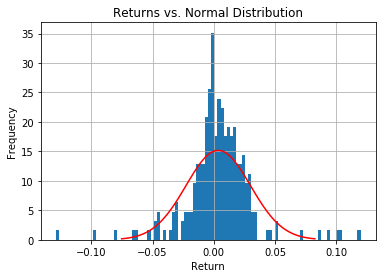

At a confidence level of 90 perent your Value at Risk is -0.030036
At a confidence level of 95 perent your Value at Risk is 0.046904
At a confidence level of 99 perent your Value at Risk is -0.057506


In [99]:
#First I imported the necessary libraries. Yfinance is needed for historical stock prices.
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as scipy
import seaborn as sns
%matplotlib inline

#Here I define the function VaR_Calc, where you can input the stock ticker name and the time frame you are examining. 
def VaR_Calc(s1,time):
    
    #Here I find the percentage returns of the stock.
    stock1 = yf.Ticker(s1)
    stock1_hist = stock1.history(period= time)
    stock_choice = stock1_hist['Close']
    stock_choice = stock_choice.dropna()
    stock1_PercentageReturn = pd.DataFrame(stock_choice)
    x = stock1_PercentageReturn.pct_change()
    x = x.dropna()
    
    #Then find the mean and standard deviation of the returns
    mean = np.mean(x['Close'])
    std = np.std(x['Close'])
    
    #Plot out the returns vs the normal distribution.
    x['Close'].hist(bins=100, normed=True)
    best_fit_line = np.linspace(mean - 3*std, mean+3*std,100)
    plt.plot(best_fit_line, scipy.norm.pdf(best_fit_line, mean, std), "r")
    plt.title("Returns vs. Normal Distribution")
    plt.xlabel('Return')
    plt.ylabel('Frequency')

    plt.show()

    #Calculate the VaR at different confidence intervals based on mean and standard deviation of returns.
    VaR_90 = norm.ppf(1-0.9,mean,std)
    VaR_95 = norm.ppf(1-0.05, mean,std)
    VaR_99 = norm.ppf(1-0.99, mean, std)
    
    #If somone has a X% confidence level, he is X% certain that the VaR will fall within this confidence interval.
    print("At a confidence level of 90 perent your Value at Risk is %f" %VaR_90)
    print("At a confidence level of 95 perent your Value at Risk is %f" %VaR_95)
    print("At a confidence level of 99 perent your Value at Risk is %f" %VaR_99)
    
VaR_Calc("AAPL", "1y")
